In [1]:
from function_memoire import *
from tabulate import tabulate


# Mémoire NCE-GAN

# I ) NCE for a 1D distribution

Data $X \sim  N(m,s)$

Noise $Y \sim  Q = \mu +\sigma N(0,1)$ with $\mu, \sigma$ fixed (in the code it is fixed at mu_unit and sigma_init)

## Lets experiment NCE with different values of $\mu_{data}, \sigma_{data} , \mu_{noise}, \sigma_{noise}$ 

### Cas 1 : Loi du bruit très distincte de l'échantillon: 
* ( mu_data = 12, sigma _data= 1 ////VS//// mu_noise=24 , sigma_noise = 5)

In [3]:
mupo = 12
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

est_const=[]
nb_it=[]

for i in range(10):
    grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 5, learning_rate = [1,0.01], max_iters = 500, nu =1)    
    est_const.append(grad.cte)
    nb_it.append(len(grad.ctes))
    
quad_error = np.mean((np.array(est_const) - 1/(sqrt(2*pi)*sigmapo))**2 )
var_estim = np.var(np.array(est_const))
mean_it = np.mean(np.array(nb_it))

tab=[['quadratic error', quad_error],['Variance estim', var_estim],['Number of Iterations Average',mean_it],["true constant value" ,1/(sqrt(2*pi)*sigmapo)]]

print(tabulate(tab))
   
#print("constant estimate",grad.cte)
print(" nbre d'itérations", len(grad.ctes))

----------------------------  -------------
quadratic error                  0.00472645
Variance estim                   0.00186036
Number of Iterations Average  5001
----------------------------  -------------
true constant value 0.3989422804014327
 nbre d'itérations 5001


#### Impact de nu =(Taille echantillon du bruit)/(Taille echantillon data)

In [12]:
mupo = 12
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 
x= np.linspace(1,100,num=50)

ctes=[]
V1=[]
C1 = []

for i in x:
    
    for j in range(10):
        
        grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 100, nu = i)
        #print(grad.m0)
        ctes.append(grad.cte)
    
    C1.append(np.mean((np.array(ctes)-1/(sqrt(2*pi)*sigmapo))**2))
    V1.append(np.var(ctes))
    ctes = []
    
#print(ctes)




In [ ]:
mupo = 12
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

H = []

for i in x:
    grad = NCEDescente1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500, nu =i)
    H.append(grad.cte)
plt.hist(H)

[Text(0, 0.5, 'var'), Text(0.5, 0, 'nu')]

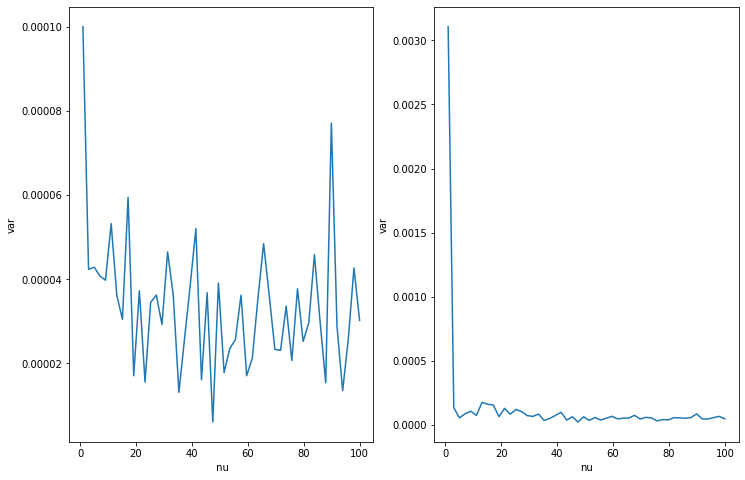

In [23]:
#

#fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig= plt.figure(figsize=(12,8))
ax1= plt.subplot(1,3,1)
ax1.plot(x,V1)
ax1.set(xlabel=" nu",ylabel="var")

ax2=plt.subplot(1,3,2)
ax2.plot(x,C1)
ax2.set(xlabel='nu',ylabel='Quadratic Erro')

ax3= plt.subplot(1,3,3)
ax3.hist(H)
ax3.set(ylabel='Valeur constante')

#### Remarques:
 * Lorsque nu diverge (i.e la taille du bruit est relativement importante par rapport à celle de l'échantillon) le code semble se débloquer et le NCE a une variance chaotique.

### Cas 2: Loi du bruit"raisonnablement" distincte de celle de l'échantillon

In [27]:
### NCE 

mupo = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

est_const=[]
nb_it=[]

for i in range(10):
    grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 7, sigma_init=4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu =1)    
    est_const.append(grad.cte)
    nb_it.append(len(grad.ctes))
    
quad_error = np.mean((np.array(est_const) - 1/(sqrt(2*pi)*sigmapo))**2 )
var_estim = np.var(np.array(est_const))
mean_it = np.mean(np.array(nb_it))

tab=[['quadratic error', quad_error],['Variance estim', var_estim],['Number of Iterations Average',mean_it]]


print(tabulate(tab))


----------------------------  --------------
quadratic error                  2.2842e-05
Variance estim                   5.18955e-06
Number of Iterations Average  4928
----------------------------  --------------


In [30]:
#### Calcul variance NCE

mupo = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


x= np.linspace(1,100,num=50)

ctes=[]
C2=[]
V2=[]
for i in x:
    
    for j in range(10):
        
        grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 7, sigma_init=4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 200, nu =i)
        #print(grad.m0)
        ctes.append(grad.cte)
    
    C2.append(np.mean((np.array(ctes)-1/(sqrt(2*pi)*sigmapo))**2))
    V2.append(np.var(ctes))
    ctes = []
    
#print(ctes)




In [ ]:
## Calcul histogramme NCE 

mupo = 5
sigmapo = 7
batch_size= 100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size))

H = []

for i in range (50):
    grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 7, sigma_init= 4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu = 1)
    H.append(grad.cte)



NameError: name 'H' is not defined

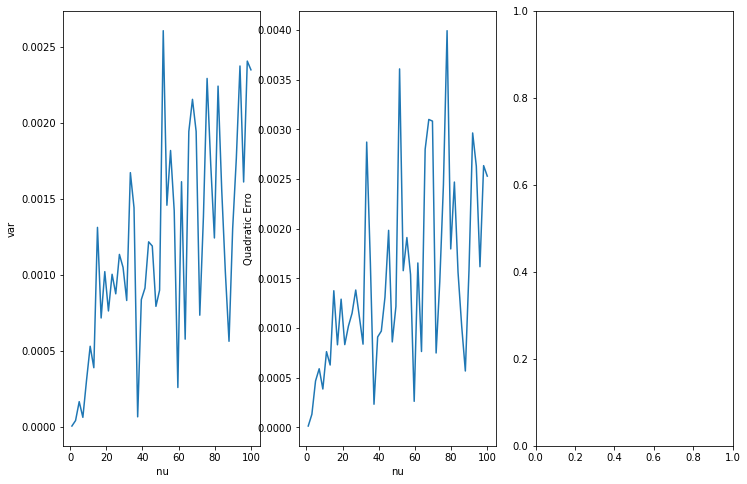

In [32]:
fig= plt.figure(figsize=(12,8))

ax1= plt.subplot(1,3,1)
ax1.scatter(x,V)
ax1.set(xlabel=" nu",ylabel="var")

ax2=plt.subplot(1,3,2)
ax2.plot(x,C)
ax2.set(xlabel='nu',ylabel='Quadratic Erro')

ax3= plt.subplot(1,3,3)
ax3.hist(H)


#### Remarques:
 * On remarque que conformément au résultat théorique. Lorsque nu diverge vers $+\infty$ la variance du NCE diminue
 * L'estimateur ne semble pas biaisé d'après l'histogramme et variance relativement faible pour nu=1.

### CAS 3: Bruit Très similaire à l'échantillon
* (m_data=4,sigma_data=7 /////VS////// m_noise=5,sigma_noise=7)

In [ ]:
##NCE 

mupo = 4 #we take  mu_noise = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

for i in range(10):
    grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 5, sigma_init=7, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu =1)    
    est_const.append(grad.cte)
    nb_it.append(len(grad.ctes))
    
quad_error = np.mean((np.array(est_const) - 1/(sqrt(2*pi)*sigmapo))**2 )
var_estim = np.var(np.array(est_const))
mean_it = np.mean(np.array(nb_it))

tab=[['quadratic error', quad_error],['Variance estim', var_estim],['Number of Iterations Average',mean_it]]


print(tabulate(tab))

In [35]:
##NCE Variance en fonction de nu
mupo = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


x= np.linspace(1,100,num=50)

ctes=[]
C3=[]
V3=[]

for i in x:
    
    for j in range(10):
        
        grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init= 7, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 200, nu =i )
        #print(grad.m0)
        ctes.append(grad.cte)
    
    C3.append(np.mean((np.array(ctes)-1/(sqrt(2*pi)*sigmapo))**2))
    V3.append(np.var(ctes))
    ctes = []
    
#print(ctes)


In [ ]:
#### Préparation Histogramme de la constante pour nu=1, m_data= 0.5, s_data = 1, m_noise=5, s_noise=7

mupo = 0.5
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size))

H = []

for i in range (50):
    grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init= 7, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu = 1)
    H.append(grad.cte)


AttributeError: 'PathCollection' object has no attribute 'hist'

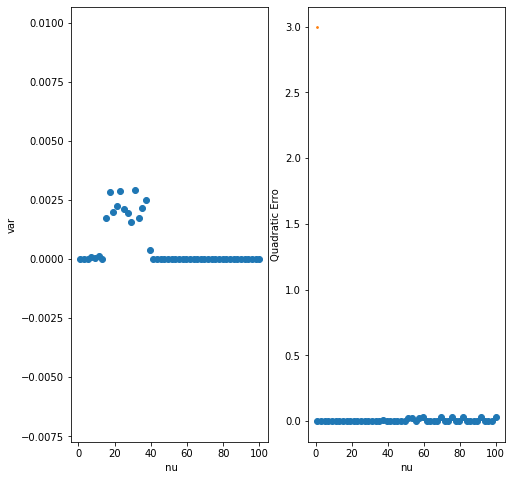

In [45]:
## plot:
fig= plt.figure(figsize=(12,8))

ax1= plt.subplot(1,3,1)
ax1.scatter(x,V)
ax1.set(xlabel=" nu",ylabel="var")

ax2=plt.subplot(1,3,2)
ax2.scatter(x,C)
ax2.set(xlabel='nu',ylabel='Quadratic Erro')

ax3= plt.scatter(1,3,3)
ax3.hist(H)
ax3.set(ylabel='Valeur constante')

#### Remarques: Loi du bruit modérément éloignée de la distribution initiale
 * On remarque que conformément au résultat théorique. Lorsque nu diverge vers $+\infty$ la variance du NCE diminue
 * L'estimateur ne semble pas biaisé d'après l'histogramme et variance relativement faible pour nu=1.
 

## GAN for estimation of a 1D density

Generator is given by $G(z) = \mu + \sigma*z$ with$z ~ N(0,1)$



In [ ]:
def GANDescent1D(x_batches, m, s,mu_init , sigma_init, cte_init , learning_rate = [0.01,0.01], max_iters = 500, nu=1):    
    
    m0 = mu_init 
    s0 =sigma_init
    cte = cte_init
    
    error_mu = [] 
    error_sigma = []
    error_cte = [] 
    
    mus = [m0]
    sigmas = [s0]
    ctes = [cte]

    batch_size= len(x_batches[0])
     
    for itr in range(max_iters): 
        
        for x in x_batches:
            
            z= random.normal( 0, 1, int(batch_size)) 
            q = m0+s0*z
            
            #Gradient in respect to the constant
            grad_cte = np.sum( 1/cte - pm0(x,m,s)/(cte*pm0(x,m,s)+ pn(x, m0,s0)) )/batch_size - (1/ batch_size)*np.sum( pm0(q,m,s)/(cte*pm0(q,m,s)+ pn(q,m0,s0)) )
            cte = cte + learning_rate[0] * grad_cte
            error_cte.append( (grad_cte) ) 
            

            #Gradient in respect to noise parameters
           
            grad_mu = -(q-m0)/s0**2 +((q-m0)*norm.pdf(q, m0, s0)/s0**2 + 
                        (q-m)*cte*exp(-0.5*((q-m)/s)**2)/s**2)/(cte*pm0(q,m,s) + norm.pdf(q,m0,s0))
            grad_sigma = grad_mu*z
            
            grad_mu = np.sum(grad_mu)/batch_size
            grad_sigma = np.sum(grad_sigma)/batch_size
            
            m0 = m0 - learning_rate[1] * grad_mu
            s0 = s0 - learning_rate[1] * grad_sigma
            
            error_mu.append( (grad_mu) ) 
            error_sigma.append((grad_sigma))
            
            ctes.append(cte)
            mus.append(m0)
            sigmas.append(s0)
            
            if ( abs(ctes[-1] - ctes[-2]) < 1e-6 and abs(mus[-1]-mus[-2])<1e-6 and abs(sigmas[-1]-sigmas[-2])<1e-6):
                return Gradient(cte,m0,s0, error_mu,error_sigma, error_cte, ctes,mus,sigmas)
            
  
    result = Gradient(cte,m0,s0, error_mu,error_sigma, error_cte, ctes,mus,sigmas)
    return result

### Lets experiment GAN with different values of  $𝜇_{𝑑𝑎𝑡𝑎},𝜎_{𝑑𝑎𝑡𝑎},𝜇_{𝑛𝑜𝑖𝑠𝑒},𝜎_{𝑛𝑜𝑖𝑠𝑒}$

In [ ]:
mupo = 24
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

print("#########  With good learning rate for gen parameters ########")

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)

print("\n #########  With bad learning rate for gen parameters #######")

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)



In [ ]:
mupo = 24
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

### Problemes numeriques !!!!

grad=GANDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=1, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 800)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)


In [ ]:
mupo = 0.5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=1, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 800)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)


### Plots and  Numerical Experiments

In [ ]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=50
MU = np.linspace(-10 , 10, num=l)

nces = np.ones(l)

for i in range(l):
    grad=GANDescent(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    
    nces[i]= grad.cte
    


In [ ]:
plt.plot(MU, nces)

In [ ]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=200
MU = np.linspace(-10 , 10, num=l)
nces1 = np.ones(l)

for i in range(l):
    grad=NCEDescent(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    

    nces1[i]= grad.cte
    


In [ ]:
plt.scatter(MU, nces1)
#plt.hist( nces1)

In [ ]:
mupo = 24
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=0.2, cte_init = 0.2, learning_rate = 0.01, max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

In [ ]:
mupo = 0.5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 0.5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

In [ ]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

In [ ]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7 #we take sigma_noise  = 5
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=5, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))